# Clustering

## Data Preparation

In [1]:
import pandas as np
bnb = np.read_csv("air_bnb.csv") #load dataset 
bnb = bnb.dropna()
bnb = bnb[bnb.price != 0]
bnb = bnb[bnb.minimum_nights != 0]
bnb

id                                               name    host_id  \
0          2015   Berlin-Mitte Value! Quiet courtyard/very central       2217   
1          2695                 Prenzlauer Berg close to Mauerpark       2986   
2          3176                    Fabulous Flat in great Location       3718   
3          3309                  BerlinSpot Schöneberg near KaDeWe       4108   
4          7071                   BrightRoom with sunny greenview!      17391   
...         ...                                                ...        ...   
22449  29772631                 Cosy and lovely room near Ostkreuz   20727291   
22463  29784461     House on the water HT10 - Heart of East Berlin   22437698   
22475  29792124                         Welcome to Light Apartment  224133729   
22508  29817383                                     Prenzlauerberg  224295751   
22536  29849565  Super zentrales Apartment + Garten für 6 Personen     607481   

       host_name       neighbourhood_group             neighbourhood  \
0            Ian                     Mitte           Brunnenstr. Süd   
1        Michael                    Pankow  Prenzlauer Berg Nordwest   
2         Britta                    Pankow   Prenzlauer Berg Südwest   
3           Jana    Tempelhof - Schöneberg           Schöneberg-Nord   
4         Bright                    Pankow            Helmholtzplatz   
...          ...                       ...                       ...   
22449       Anna               Lichtenberg           Neu Lichtenberg   
22463  Sebastian        Treptow - Köpenick           Oberschöneweide   
22475       Inna  Friedrichshain-Kreuzberg  Frankfurter Allee Süd FK   
22508      Salem                    Pankow  Prenzlauer Berg Nordwest   
22536       Sven                    Pankow   Prenzlauer Berg Südwest   

        latitude  longitude        room_type  price  minimum_nights  \
0      52.534537  13.402557  Entire home/apt     60               4   
1      52.548513  13.404553     Private room     17               2   
2      52.534996  13.417579  Entire home/apt     90              62   
3      52.498855  13.349065     Private room     26               5   
4      52.543157  13.415091     Private room     42               2   
...          ...        ...              ...    ...             ...   
22449  52.502952  13.490870     Private room     25               2   
22463  52.457982  13.526945  Entire home/apt     99               1   
22475  52.507884  13.467071     Private room     25               1   
22508  52.552250  13.410904  Entire home/apt     70               1   
22536  52.536666  13.411360  Entire home/apt    150              10   

       number_of_reviews last_review  reviews_per_month  \
0                    118  2018-10-28               3.76   
1                      6  2018-10-01               1.42   
2                    143  2017-03-20               1.25   
3                     25  2018-08-16               0.39   
4                    197  2018-11-04               1.75   
...                  ...         ...                ...   
22449                  1  2018-11-04               1.00   
22463                  5  2018-11-06               5.00   
22475                  1  2018-11-05               1.00   
22508                  1  2018-11-07               1.00   
22536                  2  2018-11-07               2.00   

       calculated_host_listings_count  availability_365  
0                                   4               141  
1                                   1                 0  
2                                   1               220  
3                                   1               297  
4                                   1                26  
...                               ...               ...  
22449                               1                32  
22463                               2               339  
22475                               1                 8  
22508                            

In [2]:
#drop kolom yang tidak dipakai
df = bnb
col = ["name", "minimum_nights", "price", "neighbourhood_group"]
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df = df[col]
df

name  minimum_nights  \
0       Berlin-Mitte Value! Quiet courtyard/very central               4   
1                     Prenzlauer Berg close to Mauerpark               2   
2                        Fabulous Flat in great Location              62   
3                      BerlinSpot Schöneberg near KaDeWe               5   
4                       BrightRoom with sunny greenview!               2   
...                                                  ...             ...   
22449                 Cosy and lovely room near Ostkreuz               2   
22463     House on the water HT10 - Heart of East Berlin               1   
22475                         Welcome to Light Apartment               1   
22508                                     Prenzlauerberg               1   
22536  Super zentrales Apartment + Garten für 6 Personen              10   

       price       neighbourhood_group  
0         60                     Mitte  
1         17                    Pankow  
2         90                    Pankow  
3         26    Tempelhof - Schöneberg  
4         42                    Pankow  
...      ...                       ...  
22449     25               Lichtenberg  
22463     99        Treptow - Köpenick  
22475     25  Friedrichshain-Kreuzberg  
22508     70                    Pankow  
22536    150                    Pankow  

[18581 rows x 4 columns]

In [3]:
#filtering data
df = df[(df["price"] <= 100)]
df = df[(df["minimum_nights"] <= 10)]

In [4]:
#import plotly untuk plot
import plotly.express as px
import plotly.graph_objects as go
import plotly.tools as tls
fig = px.scatter(bnb, x="price", y="minimum_nights", hover_data=['name'])
fig.update_layout(title='Raw Data')
fig.show()

In [5]:
#baris ini untuk merestart index setelah data di-filter
df = df.reset_index(drop=True)

In [6]:
#rename kolom price dan minnimumn_nights untuk kemudahan
df.rename(columns={'price':'x',
                          'minimum_nights':'y'}, 
                 inplace=True)
df.columns

Index(['name', 'y', 'x', 'neighbourhood_group'], dtype='object')

In [7]:
fig = px.scatter(df, x="x", y="y", hover_data=['name'], labels={'x':'price', 'y':'minimum_nights'})
fig.update_layout(title='Filtered Data')
fig.show()

In [8]:
import numpy as np
import copy

In [9]:
#Create Random Centroid
def centroidsRandom(k):
	acak = []
	for z in range((k)):
		acak.append(np.random.randint(0,1000))
	
	centroids = {
    i+1: [df['x'][acak[i]], df['y'][acak[i]]]
    for i in range(k)
	}
	return centroids

In [10]:
#color index
def coloring(k, col):
	if (k==1):
		col = {1: 'r'}
	elif (k==2):
		col = {1: 'r', 2: 'g'}
	elif (k==3):
		col = {1: 'r', 2: 'g', 3: 'b'}
	elif (k==4):
		col = {1: 'r', 2: 'g', 3: 'b', 4:'y'}
	elif (k==5):
		col = {1: 'r', 2: 'g', 3: 'b', 4:'y', 5:'black'}
	elif (k==6):
		col = {1: 'r', 2: 'g', 3: 'b', 4:'y', 5:'black', 6:'brown'}

	return col

In [11]:
#assign titik ke centroids
def assign(df, centroids):
    for i in centroids.keys():
        # Hitung jarak titik dengan centroids
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    #insert squared error to list
    sque.append(np.sqrt((df['x'] - centroids[i][0]) ** 2 + (df['y'] - centroids[i][1]) ** 2)**2)
    return df

In [12]:
#update centroids ke titik baru
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

In [15]:
#menghitung sse untuk evaluasi
def countSse(sse):
    jumlah = 0
    newsse = []
    for e in range(len((sse))):
        newsse.append((sse[e][1]))
    for f in range(len(newsse)):
        jumlah += newsse[f]


    return jumlah

In [16]:
colmap = {}
sque = []
k = 3 #initial centroids = 3
newsse = []
colmap = coloring(k, colmap)
centroids = centroidsRandom(k)

In [17]:
#titik random centroids
centroids

{1: [60, 1], 2: [44, 1], 3: [55, 3]}

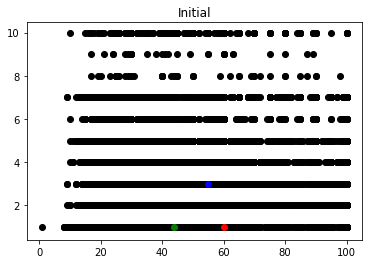

In [18]:
#plotting ininital centroids
import matplotlib.pyplot as plt
plt.scatter(df['x'], df['y'], color='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title("Initial")
plt.show()

In [19]:
#assign ke centroids terdekat
df = assign(df, centroids)
old_centroids = copy.deepcopy(centroids)

In [20]:
#running iterasi sampai centroids tidak berpindah
run = 1
while True:
    run += 1
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assign(df, centroids)
    if closest_centroids.equals(df['closest']):
        print("Stopping loop after ", run, " loop")
        break

sse_1 = countSse(sque)
print(sse_1)

Stopping loop after  5  loop
6482.469806796939


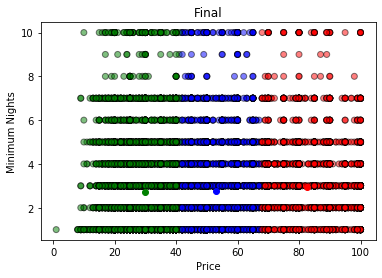

In [21]:
#plotting final 
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title("Final")
plt.xlabel("Price")
plt.ylabel("Minimum Nights")
plt.show()

## Eksperimen kedua

{1: [65, 3], 2: [98, 3], 3: [80, 8], 4: [100, 3]}


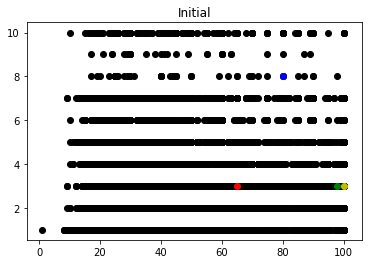

Stopping loop after  12  loop
76589.75418013489


In [22]:
colmap = {}
sque = []
k = 4
newsse = []
colmap = coloring(k, colmap)
centroids = centroidsRandom(k)
print(centroids)
plt.scatter(df['x'], df['y'], color='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title("Initial")
plt.show()

df = assign(df, centroids)
old_centroids = copy.deepcopy(centroids)

run = 1
while True:
    run += 1
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assign(df, centroids)
    if closest_centroids.equals(df['closest']):
        print("Stopping loop after ", run, " loop")
        break

sse_2 = countSse(sque)
print(sse_2)

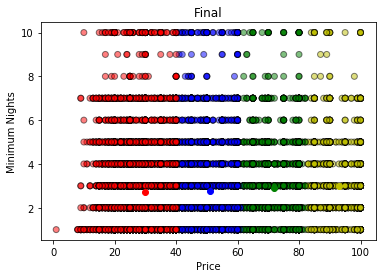

In [23]:
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title("Final")
plt.xlabel("Price")
plt.ylabel("Minimum Nights")
plt.show()

## Eksperimen ketiga

In [27]:
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objects as go
import cufflinks as cf
init_notebook_mode(connected=True)
lab = bnb['neighbourhood_group'].value_counts().keys().tolist()
val = bnb["neighbourhood_group"].value_counts().values.tolist()
trace = go.Pie(labels=lab, 
                values=val, 
                marker=dict(colors=['red']), 
                # Seting values to 
                hoverinfo="value"
              )
data = [trace]
layout = go.Layout(title="Neihgbourhood Group")
fig = go.Figure(data = data,layout = layout)
iplot(fig)

{1: [90, 7], 2: [29, 4], 3: [30, 1]}


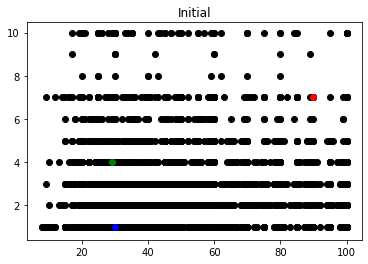

Stopping loop after  5  loop
11068.701019354658


In [25]:
df = df[df.neighbourhood_group == 'Friedrichshain-Kreuzberg']
df = df.reset_index(drop=True) #lakukan reset index kembali
colmap = {}
sque = []
k = 3
newsse = []
colmap = coloring(k, colmap)
centroids = centroidsRandom(k)
print(centroids)
plt.scatter(df['x'], df['y'], color='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title("Initial")
plt.show()

df = assign(df, centroids)
old_centroids = copy.deepcopy(centroids)

run = 1
while True:
    run += 1
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assign(df, centroids)
    if closest_centroids.equals(df['closest']):
        print("Stopping loop after ", run, " loop")
        break

sse_3 = countSse(sque)
print(sse_3)

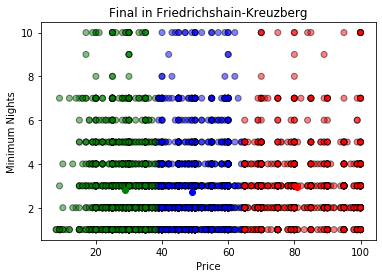

In [26]:
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title("Final in Friedrichshain-Kreuzberg")
plt.xlabel("Price")
plt.ylabel("Minimum Nights")
plt.show()